## Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [37]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend


## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [32]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


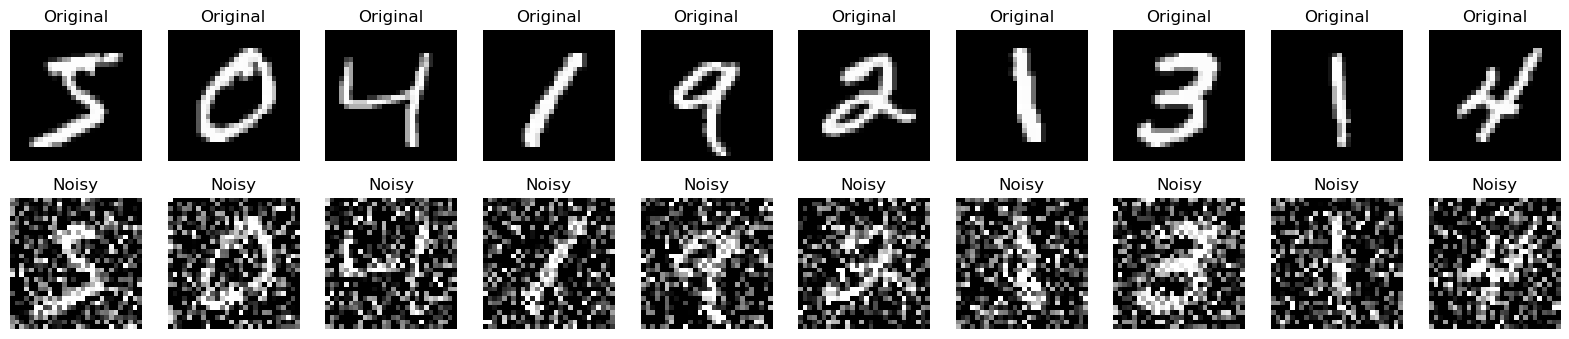

In [33]:
#Define noise value & add it to the images
noise = 0.5
noise_x_train = x_train + np.random.normal(loc=0, scale=noise, size=x_train.shape)
noise_x_test = x_test + np.random.normal(loc=0, scale=noise, size=x_test.shape)

#Normalization of pixel values between 0 and 1 & makes them floating point numbers
noise_x_train = np.clip(noise_x_train, 0., 1.)
noise_x_test = np.clip(noise_x_test, 0., 1.)

#Function to compare original vs noisy images
def number_images(original, noisy, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        #Original image
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis("Off")
        
        #Noisy image
        ax = plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis("Off")
    plt.show()

#Apply the function for x_train and noise_x_train
number_images(x_train, noise_x_train)


In [34]:
#Question 2 NO NOISE

#Define parameters for batch_size, num_classes, and epochs
batch_size = 128
num_classes = 10
epochs = 20

#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Define NN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

#Fit the model on x_train + y_train & defined parameters + utilize validation data to see how well the model performed on unseen data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

#Evaluation of the model + display the results
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)               │    401,920 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_16 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_17 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 10)                │      5,130 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8662 - loss: 0.4456 - val_accuracy: 0.9636 - val_loss: 0.1058
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1078 - val_accuracy: 0.9722 - val_loss: 0.0815
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0700 - val_accuracy: 0.9783 - val_loss: 0.0719
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0535 - val_accuracy: 0.9782 - val_loss: 0.0667
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9801 - val_loss: 0.0676
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0356 - val_accuracy: 0.9794 - val_loss: 0.0661
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0357 - val_accuracy: 0.9784 - val_loss: 0.0736
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.

In [35]:
print("""After defining the parameters & not adding any noise to the images, the test accuracy of the model turned out to be 0.9836999773979187 & the test loss for the model was 0.08285236358642578""")

After defining the parameters & not adding any noise to the images, the test accuracy of the model turned out to be 0.9836999773979187 & the test loss for the model was 0.08285236358642578


In [39]:
###Question 2 NOISE PRESENT

#Noise function that adds noise to each image & normalizes the pixel values between 0 and 1 & makes them floating point numbers
def noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

#Create datasets with values that have been transformed to contain noise
noise_x_train = noise(x_train)
noise_x_test = noise(x_test)

#Define NN model with noise
noise_model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
model.summary()

#Compile the model
noise_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

#Fit the model on noise_x_train + y_train & defined parameters + utilize validation data to see how well the model performed on unseen data (noise_x_test & y_test)
history_noise = noise_model.fit(noise_x_train, y_train,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(noise_x_test, y_test))

#Evaluation of the model + display the results
score_noise = noise_model.evaluate(noise_x_test, y_test, verbose=0)
print('Noisy Data - Test loss:', score_noise[0])
print('Noisy Data - Test accuracy:', score_noise[1])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)               │    401,920 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_16 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_17 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 10)                │      5,130 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_27 (Dense)                │ (None, 512)               │      5,632 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_18 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_28 (Dense)                │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_19 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_29 (Dense)                │ (None, 10)                │      5,130 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_30 (Dense)                │ (None, 512)               │      5,632 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_20 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_31 (Dense)                │ (None, 512)               │    262,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_21 (Dropout)            │ (None, 512)               │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_32 (Dense)                │ (None, 10)                │      5,130 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,555,956 (9.75 MB)

 Trainable params: 1,216,542 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,339,414 (5.11 MB)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7008 - loss: 0.8997 - val_accuracy: 0.8781 - val_loss: 0.3768
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8859 - loss: 0.3457 - val_accuracy: 0.9098 - val_loss: 0.2859
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9244 - loss: 0.2339 - val_accuracy: 0.9169 - val_loss: 0.2535
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1620 - val_accuracy: 0.9233 - val_loss: 0.2430
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.1220 - val_accuracy: 0.9267 - val_loss: 0.2325
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.0950 - val_accuracy: 0.9221 - val_loss: 0.2775
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0734 - val_accuracy: 0.9203 - val_loss: 0.3018
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0682 - val_accuracy: 0.

In [40]:
print("""By adding noise to each image (by a factor of 0.05), the test accuracy of the model dropped down to 0.9297000169754028, while the test loss of the model increased to 0.35639652609825134.""")

By adding noise to each image (by a factor of 0.05), the test accuracy of the model dropped down to 0.9297000169754028, while the test loss of the model increased to 0.35639652609825134.


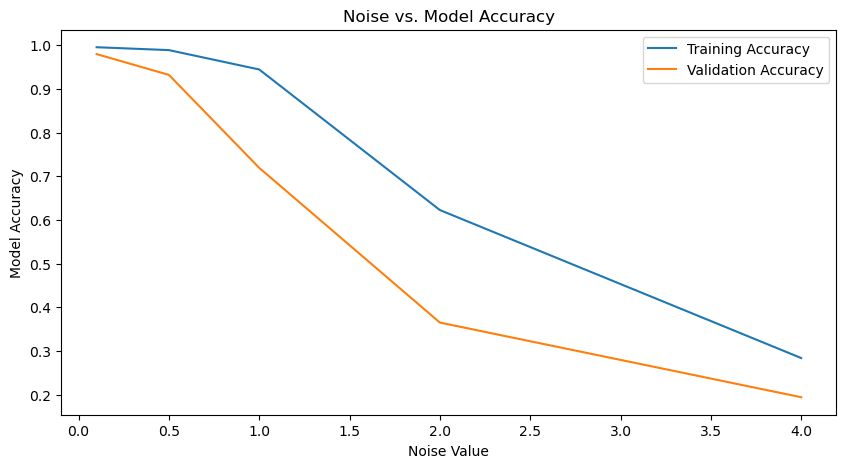

In [41]:
#Define noise parameter
noise_scales = [0.1, 0.5, 1.0, 2.0, 4.0]

#Create lists to store accuracy values for both the training and validation sets
accuracy_training = []
accuracy_validation = []

#Define loop that applies noise to training and testing sets for each scale in noise_scales + runs NN to assess model accuracy as it relates to that specific noise level
for scale in noise_scales:
    noise_x_train = noise(x_train, scale)
    noise_x_test = noise(x_test, scale)
    
    #Define the model
    model = Sequential([
        Dense(512, activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    
    #Train the model on noise_x_train + y_train & defined parameters + utilize validation data to see how well the model performed on unseen data (noise_x_test & y_test)
    evaluation = model.fit(noise_x_train, y_train,
                           batch_size=128, epochs=20, verbose=0,
                           validation_data=(noise_x_test, y_test))
    
    #Obtain accuracies for training and validation and append them to their respective list
    accuracy_training.append(evaluation.history['accuracy'][-1])
    accuracy_validation.append(evaluation.history['val_accuracy'][-1])

#Plot the results + analyze the results
plt.figure(figsize=(10, 5))
plt.plot(noise_scales, accuracy_training, label='Training Accuracy')
plt.plot(noise_scales, accuracy_validation, label='Validation Accuracy')
plt.title('Noise vs. Model Accuracy')
plt.xlabel('Noise Value')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

In [45]:
print("""It seems like validation accuracy is highest (>90%) when the noise value is <= 0.5. Once the noise value is > 0.5, the validation set experiences a severe drop in accuracy.""")

It seems like validation accuracy is highest (>90%) when the noise value is <= 0.5. Once the noise value is > 0.5, the validation set experiences a severe drop in accuracy.
